    year  month  day  counts       time
0   2018      1    1  237118   2018/1/1
1   2018      1    2  238152   2018/1/2
2   2018      1    3  266992   2018/1/3
3   2018      1    4  122222   2018/1/4
4   2018      1    5  265212   2018/1/5
5   2018      1    6  281260   2018/1/6
6   2018      1    7  237393   2018/1/7
7   2018      1    8  259792   2018/1/8
8   2018      1    9  284662   2018/1/9
9   2018      1   10  290362  2018/1/10
10  2018      1   11  304982  2018/1/11
11  2018      1   12  317639  2018/1/12
12  2018      1   13  321879  2018/1/13
13  2018      1   14  290953  2018/1/14
14  2018      1   15  246888  2018/1/15
15  2018      1   16  295727  2018/1/16
16  2018      1   17  305009  2018/1/17
17  2018      1   18  330715  2018/1/18
18  2018      1   19  325598  2018/1/19
19  2018      1   20  294520  2018/1/20
20  2018      1   21  252191  2018/1/21
21  2018      1   22  261653  2018/1/22
22  2018      1   23  287525  2018/1/23
23  2018      1   24  315567  2018/1/24


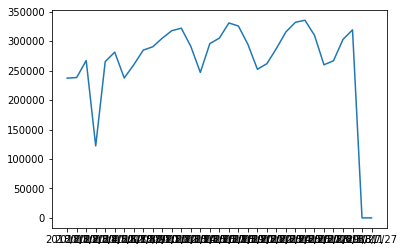

In [4]:
# [RQ2] What are the time slots with more passengers?
# Set your own time slots and discover which are those when Taxis drive the highest number of passengers
# overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

import matplotlib.pyplot as plt
import pandas as pd

xmlpath = "yellow_tripdata_2018-01.csv";

chunksize = 50000
yellowCabDf = None
taxiZoneDf = pd.read_csv('taxi_zone_lookup.csv', usecols=['LocationID', 'Borough', 'Zone'])
# print(taxiZoneDf.head())
finalDf = pd.DataFrame([])
counter = 0;

for chunk in pd.read_csv(xmlpath,
                         usecols=['tpep_pickup_datetime', 'trip_distance', 'tpep_dropoff_datetime', 'PULocationID'],
                         chunksize=chunksize, iterator=True):
    joinDf = chunk\
        .dropna() \
        .merge(taxiZoneDf, how='inner', left_on=['PULocationID'], right_on=['LocationID'])
    # .drop(chunk[(chunk.trip_distance <= 0) | (chunk.tpep_dropoff_datetime == chunk.tpep_pickup_datetime)]) \

    tempDf = pd.DatetimeIndex(joinDf['tpep_pickup_datetime'])
    joinDf['year'] = tempDf.year
    joinDf['month'] = tempDf.month
    joinDf['day'] = tempDf.day
    joinDf['hour'] = tempDf.hour
    joinDf['minute'] = tempDf.minute
    result = pd.DataFrame(joinDf.groupby(['year', 'month', 'day'], as_index=True).size().reset_index(name='counts'))

    finalDf = pd.concat([finalDf, result]).groupby(['year', 'month', 'day'], as_index=False)['counts'].sum()


finalDf = finalDf.drop(finalDf[finalDf.year != 2018].index)
finalDf = pd.DataFrame(finalDf.groupby(['year', 'month', 'day']).sum().reset_index())
finalDf['time'] = finalDf['year'].map(str) + '/' + finalDf['month'].map(str) + '/' + finalDf['day'].map(str)
print(finalDf)
plt.plot(finalDf['time'], finalDf['counts'])
#plt.savefig()
plt.show()
